In [1]:
import tensorflow as tf

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [15]:
y_train[0]

5

In [16]:
def plot_sample(X,y,index):
    plt.figure(figsize=(12,2))
    plt.imshow(X[index])
    plt.xlabel([y[index]])

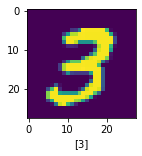

In [17]:
plot_sample(X_train,y_train,7)

In [18]:
#Processing the data

In [19]:
X_train = X_train.reshape(60000,28,28,1)

In [20]:
X_test = X_test.reshape(10000,28,28,1)

In [21]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)

In [23]:
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [25]:
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [46]:
model = Sequential()

In [47]:
model.add(Conv2D(64,kernel_size = 3,activation = 'relu',input_shape = (28,28,1) ))
model.add(MaxPool2D(pool_size = 2,strides = 2))

model.add(Conv2D(32,kernel_size = 3,activation = 'relu'))
model.add(MaxPool2D(pool_size = 2,strides = 2))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [48]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy', 
             metrics = ['accuracy'])

In [49]:
hist = model.fit(X_train,y_train_one_hot,validation_data = (X_test,y_test_one_hot),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2057 - accuracy: 0.9526 - val_loss: 0.0552 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0636 - accuracy: 0.9812 - val_loss: 0.0564 - val_accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0507 - accuracy: 0.9846 - val_loss: 0.0577 - val_accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0437 - accuracy: 0.9871 - val_loss: 0.0537 - val_accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0466 - val_accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0545 - val_accuracy: 0.9852
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.0502 -

In [51]:
df = pd.DataFrame(hist.history)

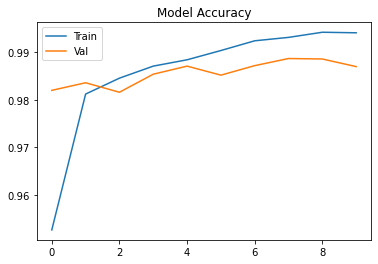

In [56]:
plt.plot(df['accuracy'])
plt.plot(df['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Val'])

In [57]:
pred = model.predict(X_test[:4])

In [60]:
predictions = [np.argmax(ele) for ele in pred]

In [61]:
predictions

[7, 2, 1, 0]

In [62]:
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

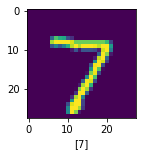

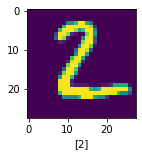

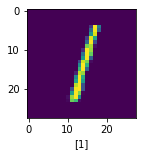

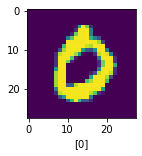

In [64]:
for i in range(4):
    plot_sample(X_test,y_test,i)